### Logistic Regression - Classification

We will do the Classification Problem. 

Logistic Regression is a common techinque used to classify binary target variable - 1 or 0

The common logistic classification models a binary outcome — something that can take two values such as true/false, yes/no, and so on. 

What is the probability of a discrete outcome given an input variable?

In [3]:
println("Logistic Regression - Classification - whether a student gets admitted into a university??
")

Logistic Regression - Classification - whether a student gets admitted into a university??



In [4]:
using CSV
using DataFrames
using Plots
using PlotlyJS
using WebIO
using ForwardDiff
using Optim
using Statistics
gr()
Plots.GRBackend()

WebIO._IJuliaInit()

Plots.GRBackend()

How to determine each applicant’s chance of admission based on their results on two exams?

### Dataset

Historical data from previous applicants that we will use as a training set for logistic regression. For each training example, we have the applicant’s scores on two exams and the admissions decision.

In [5]:
data = CSV.read("ex2data1.csv", DataFrame)

,exam1score,exam2score,decision
,Float64,Float64,Int64
1,34.6237,78.0247,0
2,30.2867,43.895,0
3,35.8474,72.9022,0
4,60.1826,86.3086,1
5,79.0327,75.3444,1
6,45.0833,56.3164,0
7,61.1067,96.5114,1
8,75.0247,46.554,1
9,76.0988,87.4206,1


In [7]:
names(data)

3-element Vector{String}:
 "exam1score"
 "exam2score"
 "decision"

In [8]:
size(data)

(100, 3)

Create a column "status" in our dataframe that translates binary outcome — 1 and 0 — to "Admitted" or "Not Admitted"

In [9]:
status = [x == 1 ? "Admitted" : "Not Admitted" for x in data.decision]
data[!, :status] = status
data

,exam1score,exam2score,decision,status
,Float64,Float64,Int64,String
1,34.6237,78.0247,0,Not Admitted
2,30.2867,43.895,0,Not Admitted
3,35.8474,72.9022,0,Not Admitted
4,60.1826,86.3086,1,Admitted
5,79.0327,75.3444,1,Admitted
6,45.0833,56.3164,0,Not Admitted
7,61.1067,96.5114,1,Admitted
8,75.0247,46.554,1,Admitted
9,76.0988,87.4206,1,Admitted


Before we do anyting, let's visualize the data

A simple scatter plot

In [11]:
x1 = data.exam1score
x2 = data.exam2score
gr()
exam_score_scatter_plot = Plots.plot(x1, x2, seriestype = :scatter, title = "Scatter Plot", markersize=3,
        alpha=.8,
        legend=false, 
        xlabel="Exam 1 Score",
        ylabel="Exam 2 Score")

Plots.savefig(exam_score_scatter_plot, "ScatterPlotExamScores-1.png")

In [13]:
exam_score_scatter_pl = PlotlyJS.plot(
    data, 
    x=:exam1score, 
    y=:exam2score, 
    color=:status,
    kind="scatter",
    mode="markers",
    labels=Dict(
        :exam1score => "Exam 1 Score",
        :exam2score => "Exam 2 Score",
        :decision => "Admission Decision"
    ),
    Layout(
        title="Scatter plot of training data - Admission Decision based on the scores from those two exams."
    ),
    marker=attr(size=10, line=attr(width=2, color="DarkSlateGrey")),
    
)

PlotlyJS.savefig(exam_score_scatter_pl, "ScatterPlotAdmissionDecision.png")

"ScatterPlotAdmissionDecision.png"

Code for the activation function — **sigmoid** — to convert the outcome into categorical value. It is an important step for Logistic Classification

Sigmoid function a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”.

In [15]:
# define sigmoid function
sigmoid(z::Real) = one(z) / (one(z) + exp(-z))

sigmoid (generic function with 1 method)

In [16]:
sigmoid(0)

0.5

In [17]:
v = [-10, 0, 10]

3-element Vector{Int64}:
 -10
   0
  10

Sigmoid code should also work with vectors and matrices. For a matrix, our function should perform the sigmoid function 
on every element.

Instead of defining sigmoid(z::Array) define sigmoid(z::Real) and then use broadcasting to apply it to the elements of an array: sigmoid.(z) (note the dot, which indicates broadcasting)

Any Julia function f can be applied elementwise to any array (or other collection) with the syntax f.(A). 

For example, sin can be applied to all elements in the vector A like so: sin.(A).

In [18]:
#Sigmoid code should also work with vectors and matrices. 
# For a matrix, our function should perform the sigmoid function 
# on every element.

# Instead of defining sigmoid(z::Array) define sigmoid(z::Real) and 
# then use broadcasting to apply it to the elements of an array: 
# sigmoid.(z) (note the dot, which indicates broadcasting)

# Any Julia function f can be applied elementwise to any array 
# (or other collection) with the syntax f.(A). 
# For example, sin can be applied to all elements in the vector A like so: sin.(A).

sigmoid.(v)

3-element Vector{Float64}:
 4.5397868702434395e-5
 0.5
 0.9999546021312976

In [19]:
A = [-10 0 10; 
    0 -20 -20;
    3 7 0]

sigmoid.(A)

3×3 Matrix{Float64}:
 4.53979e-5  0.5         0.999955
 0.5         2.06115e-9  2.06115e-9
 0.952574    0.999089    0.5

Code to visualize the sigmoid function - S shaped curve

In [20]:
sample_xs = range(-10, 10, step=1)
sample_ys = sigmoid.(sample_xs)

sigmoid_plot = Plots.plot(sample_xs, sample_ys, title="Sigmoid function")

Plots.savefig(sigmoid_plot, "SigmoidPlot.png")

Get our feature matrix ready

In [22]:
x2 = data.exam1score
x3 = data.exam2score
y = data.decision

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x2, x3);

In [26]:
funcz(X::Array, theta::Array) = X * theta

thetaInitial = zeros(3)

funcz(X, thetaInitial);

Defining our CostFunction or Log Likelihood function and set it up for Gradient Descent

Compute and display initial cost and gradient — Cost Function at initial theta (zeros):

In [42]:
# Log Likelihood function

x2 = data.exam1score
x3 = data.exam2score
y = data.decision

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x2, x3);

# Log Likelihood function in logistic regression is:
funcz(X::Array, theta::Array) = X * theta

sigmoid(z::Real) = one(z) / (one(z) + exp(-z))

thetaInitial = zeros(3)

function LogFunction(X::Array, y::Array, theta::Array)
    LTheta = -(one(length(y))/length(y)) * (sum((y .* log.(sigmoid.(funcz(X, theta))) + ((one(length(y)) .- y) .* log.(one(length(y)) .- sigmoid.(funcz(X, theta)))))))
    return LTheta
end

LogFunction(X, y, thetaInitial)


0.6931471805599452

Let's test our cost function value with a non-zero test theta

Compute and display cost and gradient with non-zero theta

In [28]:
test_theta = [-24.0, 0.2, 0.2]
LogFunction(X, y, test_theta)

0.2183301938265977

We compute gradient using ForwardDiff.gradient package method

Let's check some gradient values at zero theta and other theta values

In [29]:
thetaInitial = zeros(3)
f(theta::Vector)::Real = LogFunction(X, y, theta)
g = x -> ForwardDiff.gradient(f, theta); # g = ∇f

theta = thetaInitial

println(f(theta))
println(g(theta))

theta = [-24.0, 0.2, 0.2]
println(f(theta))
println(g(theta))

theta_1 = [-25.1614, 0.206232, 0.201472]
println(f(theta))
println(g(theta))

0.6931471805599452
[-0.1, -12.009216589291153, -11.262842205513596]
0.2183301938265977
[0.042902994899534475, 2.566234115510758, 2.6467973710824313]
0.2183301938265977
[0.042902994899534475, 2.566234115510758, 2.6467973710824313]


In [31]:
x2 = data.exam1score
x3 = data.exam2score
y = data.decision

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x2, x3);

iterations = 1000;
alpha = 0.001;
thetaInitial = zeros(3)

# Log Likelihood function in logistic regression is:
funcz(X::Array, theta::Array) = X * theta

sigmoid(z::Real) = one(z) / (one(z) + exp(-z))

function LogFunction(X::Array, y::Array, theta::Array)
    LTheta = -(one(length(y))/length(y)) * (sum((y .* log.(sigmoid.(funcz(X, theta))) + ((one(length(y)) .- y) .* log.(one(length(y)) .- sigmoid.(funcz(X, theta)))))))
    return LTheta
end

gradie(theta) = (1/m) * (X' * (sigmoid.(funcz(X, theta)) .- y))

theta = thetaInitial
result = []

for i = 1:iterations
    theta = theta - alpha * gradie(theta)
    push!(result, (i, theta, LogFunction(X, y, theta)))
end

println("Parameter theta: ", theta)
println("Minimized Log Function: ", LogFunction(X, y, theta))
println("Last Element: ", result[iterations])

Parameter theta: [-0.0694609745944538, 0.010907328656905298, 0.0009913547184689571]
Minimized Log Function: 0.6249857589104834
Last Element: (1000, [-0.0694609745944538, 0.010907328656905298, 0.0009913547184689571], 0.6249857589104834)


### Julia — Anonymous functions

The function f(x, y) can also be written with no name, as an anonymous function: (x, y) -> x^3 – y + x * y. We can, however, bind it to a name such as f = (x, y) -> x^3 – y + x * y, and then call it, for example, as f(3, 2)

In [67]:
# Log Likelihood function and gradient

x2 = data.exam1score
x3 = data.exam2score
y = data.decision

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x2, x3);

iterations = 1000;
alpha = 0.001;
thetaInitial = zeros(3)

# Log Likelihood function in logistic regression is:
funcz(X::Array, theta::Array) = X * theta

sigmoid(z::Real) = one(z) / (one(z) + exp(-z))

function LogFunction(X::Array, y::Array, theta::Array)
    LTheta = -(one(length(y))/length(y)) * (sum((y .* log.(sigmoid.(funcz(X, theta))) + ((one(length(y)) .- y) .* log.(one(length(y)) .- sigmoid.(funcz(X, theta)))))))
    return LTheta
end

f(theta::Vector)::Real = LogFunction(X, y, theta)

#g(theta::Vector)::Real = (one(length(y))/length(y)) * (sum( sigmoid.(funcz(X, theta)) .- y ) .* X)

gd = x -> ForwardDiff.gradient(f, theta); # g = ∇f

theta = thetaInitial
result = []

for i = 1:iterations
    theta = theta - alpha * gd(theta)
    push!(result, (i, theta, f(theta)))
end

println("Parameter theta: ", theta)
println("Minimized Log Function: ", f(theta))
println("Last Element: ", result[iterations])



Parameter theta: [-0.06946097459445379, 0.010907328656905293, 0.0009913547184689526]
Minimized Log Function: 0.6249857589104834
Last Element: (1000, [-0.06946097459445379, 0.010907328656905293, 0.0009913547184689526], 0.6249857589104834)


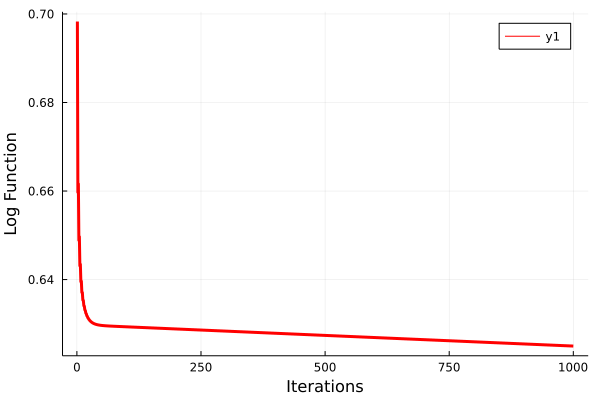

In [59]:
const_func_iteration_plot = Plots.plot(getindex.(result, 1), getindex.(result, 3), linewidth=3, color=:red, 
        xlabel="Iterations",
        ylabel="Log Function")

Plots.savefig(const_func_iteration_plot, "CostFunctionLogisticItertion.pn")

In [51]:
# Using Optim - 

x2 = data.exam1score
x3 = data.exam2score
y = data.decision

m = length(y)
x1 = ones(m, 1)
X = hcat(x1, x2, x3);

thetaInitial = zeros(3)

theta = thetaInitial

funcz(X::Array, theta::Array) = X * theta

sigmoid(z::Real) = one(z) / (one(z) + exp(-z))

MLL(theta) = -(one(length(y))/length(y)) * (sum((y .* log.(sigmoid.(funcz(X, theta))) + ((one(length(y)) .- y) .* log.(one(length(y)) .- sigmoid.(funcz(X, theta)))))))

println(MLL(theta))

# res = Optim.optimize(MLL, theta, BFGS())
res = Optim.optimize(MLL, theta, ConjugateGradient())
println(Optim.summary(res))
 
println(Optim.minimizer(res))
optimizedTheta = Optim.minimizer(res)
Optim.minimum(res)

0.6931471805599452
Conjugate Gradient
[-25.161394881867267, 0.20623220268132353, 0.20147209780460457]


0.20349770158999922

In [47]:
optimizedTheta

3-element Vector{Float64}:
 -25.161394881867267
   0.20623220268132353
   0.20147209780460457

In [48]:

x2 = data.exam1score

decision_x3 = ((-1)/optimizedTheta[3]) .* ( (optimizedTheta[2] .* x2) .+ (optimizedTheta[1]))


100-element Vector{Float64}:
 89.44603986846889
 93.88545617124925
 88.1933776659118
 63.28322872642549
 43.987727029043384
 78.73929659055244
 62.33733103878674
 48.09041278408407
 46.99099568648593
 38.46005738317282
 26.76129988163536
 48.10176191443737
 40.636048651655734
  ⋮
 44.39442586372915
 71.30292914007248
 28.57027735761489
 32.30219497740662
 68.09472244442912
 48.635036551091545
 32.919180051379705
 39.42601003069774
 81.62753757949807
 23.22625270529491
 68.24022439758151
 48.34514489579302

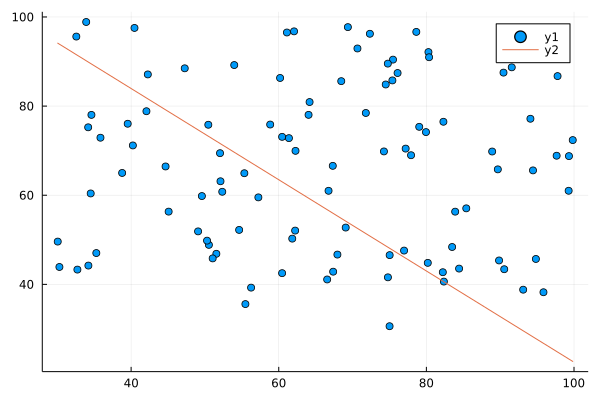

In [49]:
x2 = data.exam1score
x3 = data.exam2score
# if GR is the plotting "backend" you've chosen
Plots.scatter(x2, x3) # the points
plot!(x2, decision_x3)     # the line

In [50]:
trace1 = PlotlyJS.scatter(data, 
                        x=:exam1score, 
                        y=:exam2score, 
                        group=:status, 
                        mode="markers",
                        marker=attr(size=10, line=attr(width=2, color="DarkSlateGrey")))

trace2 = PlotlyJS.scatter(x=x2,
                        y=decision_x3,
                        mode="lines",
                        name="Decision Boundary")
                        

layout = Layout(
    title="Scatter plot of training data - Admission Decision based on the scores from two exams."
)

P = PlotlyJS.plot(trace1, layout)
PlotlyJS.addtraces(P, trace2)


data: [
  "scatter with fields legendgroup, marker, mode, name, type, x, and y",
  "scatter with fields legendgroup, marker, mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y"
]

layout: "layout with fields margin, template, and title"

After learning the parameters, you'll like to use it to predict the outcomes on unseen data. 

In this part, we will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.

Furthermore, we will compute the training and test set accuracies of 
our model.

In [492]:
# Predict probability for a student with score 45 on exam 1 
# and score 85 on exam 2 

sigmoid(optimizedTheta'*[1, 45, 85])

0.7762912088189753

In [501]:
predict(X::Array, theta::Array) = sigmoid.(X * optimizedTheta)

sigmoid_v = predict(X, optimizedTheta)

predictions = [x >= 0.5 ? 1 : 0 for x in sigmoid_v]

Statistics.mean(predictions .== y)

0.89